**1. Import the necessary libraries if you are starting a new notebook.**


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

__2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df (i.e. customer_df = pd.readcsv(""))__

In [7]:
from google.colab import drive

In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
customer_df = pd.read_csv('/content/drive/MyDrive/IronHack Bootcamp/UNIT 3/WEEK 9/we_fn_use_c_marketing_customer_value_analysis.csv')

__3. First, look at its main features (head, shape, info).__

In [10]:
customer_df .head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
customer_df.shape

(9134, 24)

In [12]:

customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [13]:

customer_df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [14]:
customer_df.corr()['Customer Lifetime Value'].sort_values(ascending=False)

Customer Lifetime Value          1.000000
Monthly Premium Auto             0.396262
Total Claim Amount               0.226451
Income                           0.024366
Number of Policies               0.021955
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
Number of Open Complaints       -0.036343
Name: Customer Lifetime Value, dtype: float64

In [15]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

__4. customer_df.columns = [column.lower().replace(' ', '_') for column in df.columns]__

In [16]:
customer_df.columns = customer_df.columns.str.lower()

In [17]:
customer_df.columns = customer_df.columns.str.replace(' ', '_', regex=False)


In [18]:
customer_df = customer_df.rename(columns={
   'employmentstatus': 'employment_status'
})

customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [19]:
#fix data types
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [20]:
#split date in year and month
customer_df['Month'] = customer_df['effective_to_date'].dt.month
customer_df['Month']

customer_df1 = customer_df.drop('effective_to_date', axis=1)

customer_df1

,customer,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,Month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [21]:
customer_df1['Month'].value_counts()

1    4898
2    4236
Name: Month, dtype: int64

__6. Plot a correlation matrix, and comment on what you observe.__

In [22]:
df_numerical = customer_df.select_dtypes(include=['float64','int64'])

In [23]:
df_numerical_corr = df_numerical.corr()
df_numerical_corr


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,Month
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820
Month,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000


In [24]:
df_numerical_corr["total_claim_amount"].sort_values(ascending=False)

total_claim_amount               1.000000
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
Month                            0.006820
months_since_policy_inception    0.003335
number_of_policies              -0.002354
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64

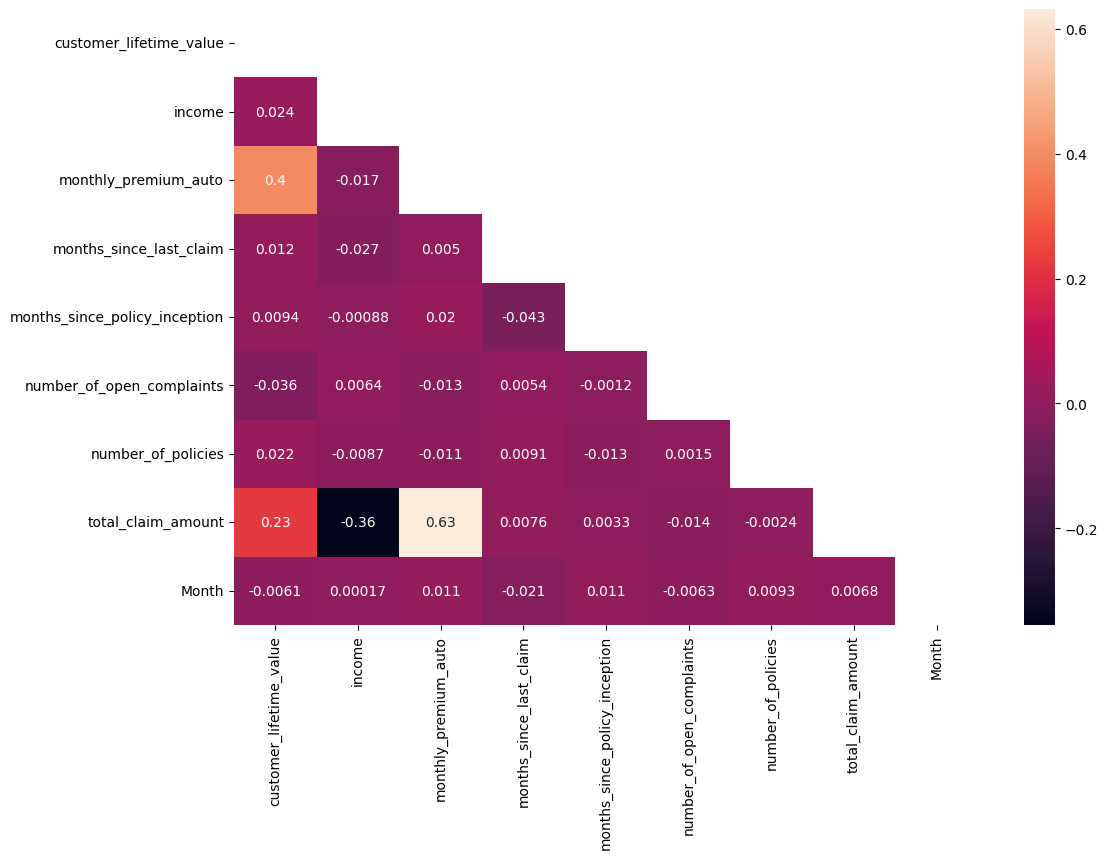

In [25]:
mask = np.zeros_like(df_numerical_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_numerical_corr, mask=mask, annot=True, ax=ax)
plt.show()


The correlation matrix exposes the subsequent insights:



* The Customer Lifetime Value (CLV) displays a reasonably positive correlation with Monthly Premium Auto (0.396), suggesting that clients exhibiting higher CLV levels tend to carry more substantial monthly premiums.

* Monthly Premium Auto also showcases a robust positive correlation with Total Claim Amount (0.632), implying that customers with elevated monthly premiums are predisposed to initiating more sizable insurance claims.

* Income demonstrates a faintly positive correlation with Customer Lifetime Value (0.024), hinting at the possibility that customers with higher incomes might possess marginally augmented CLV.

* Income maintains an adverse correlation with Total Claim Amount (-0.355), pointing out that clients with superior incomes lean towards registering less extensive insurance claims.

* The correlation between Income and Monthly Premium Auto (-0.017) appears insignificant, thereby indicating that income might exert a limited influence on the monthly premium quantum.

* The variables Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, and Number of Policies exhibit feeble correlations with other dataset variables, thereby underscoring the absence of potent associations.

In synopsis, the correlation matrix uncovers that the most salient connections exist between Monthly Premium Auto and both Customer Lifetime Value and Total Claim Amount. Moreover, Income demonstrates a feeble correlation with Customer Lifetime Value and an inverse rapport with Total Claim Amount. The residual variables seem to bear minimal or inconsequential correlations amongst themselves.

__7.Plot every continuous variable. Comment what you can see in the plots.__


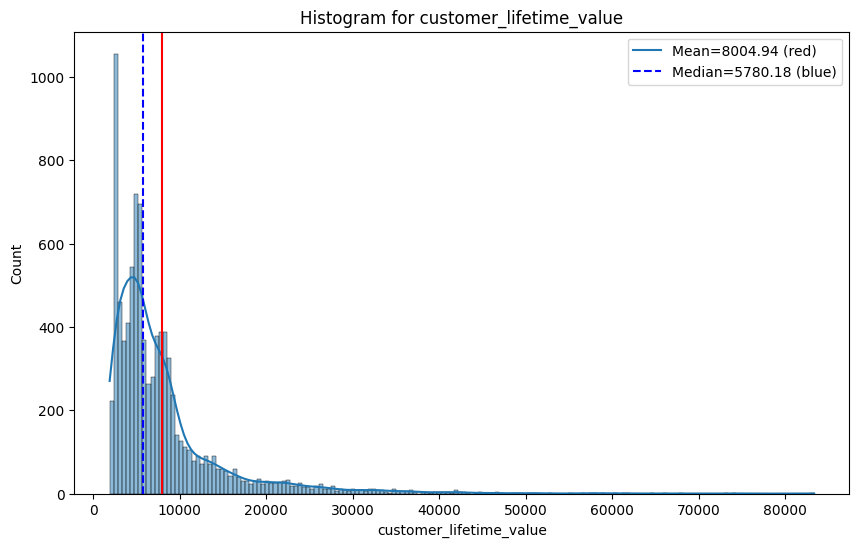

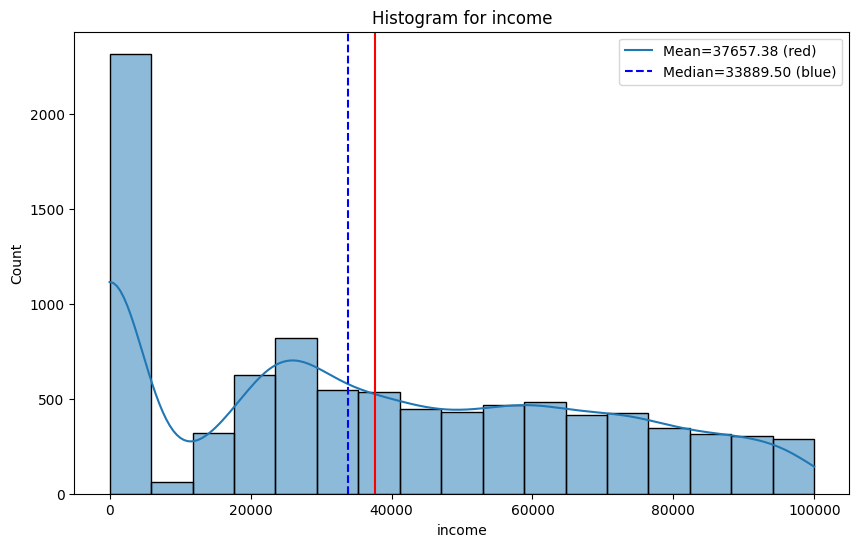

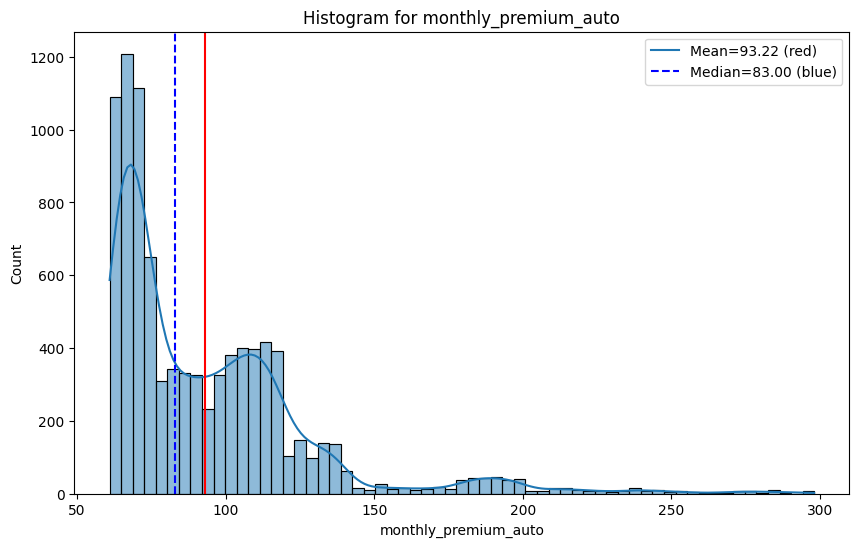

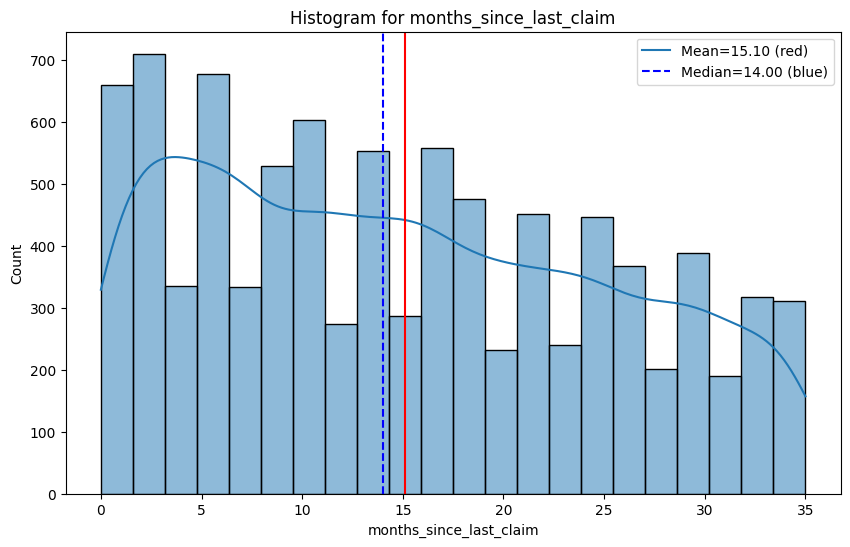

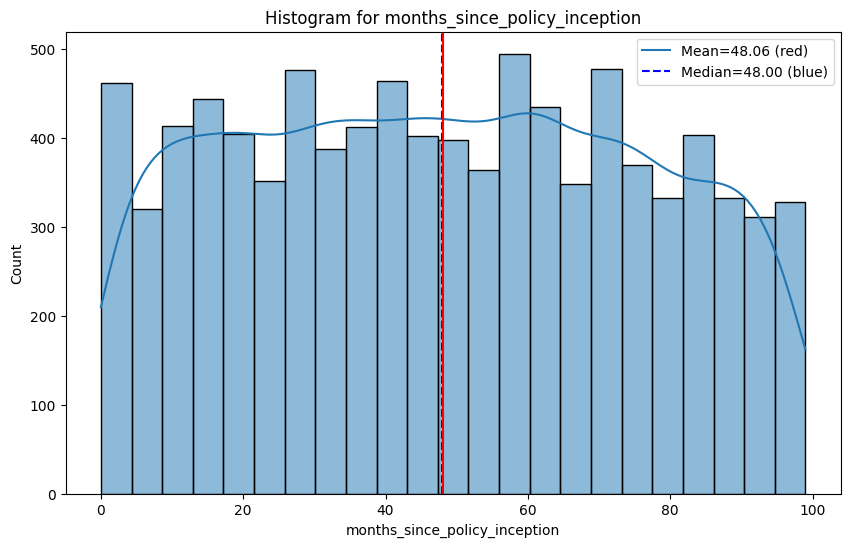

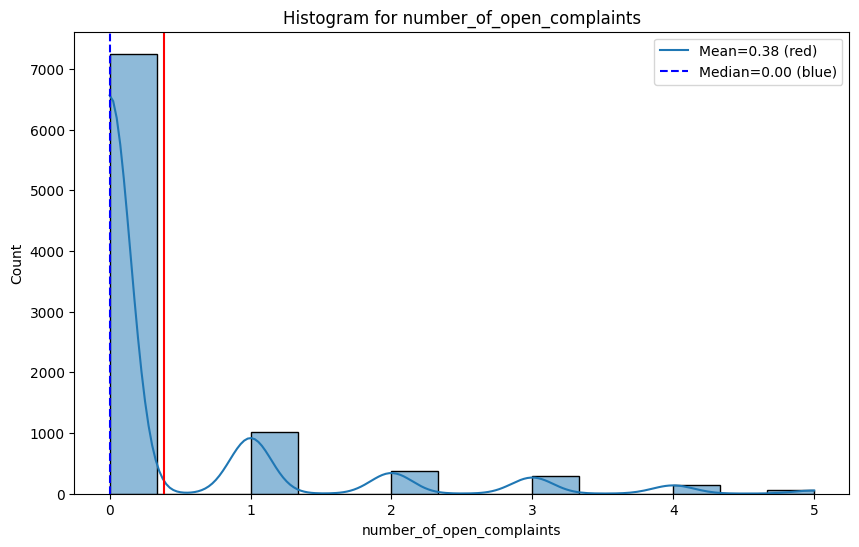

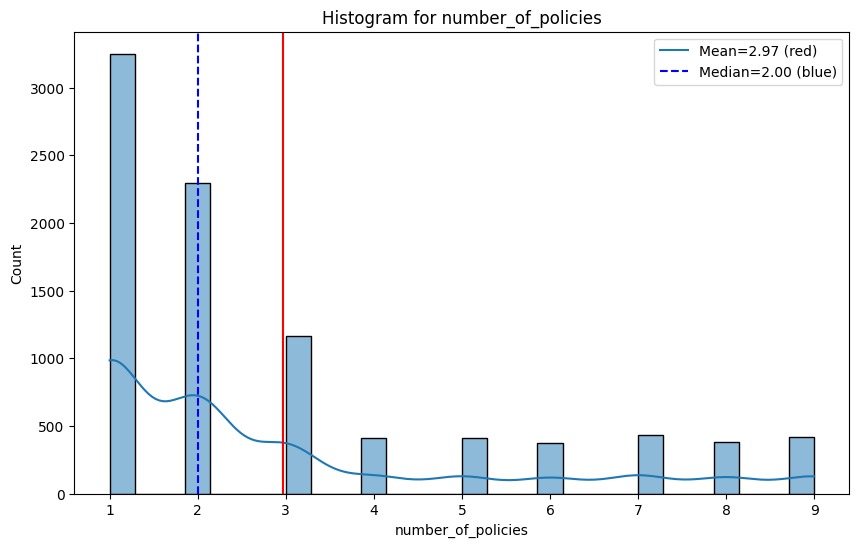

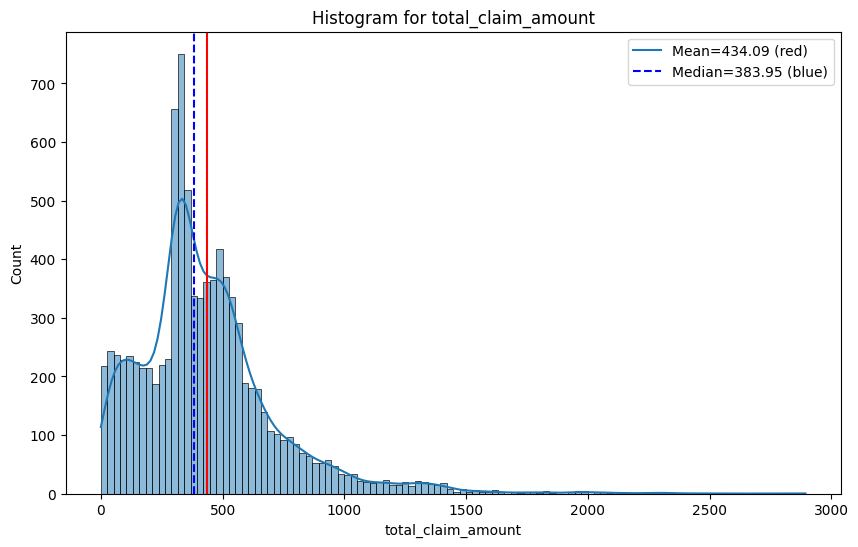

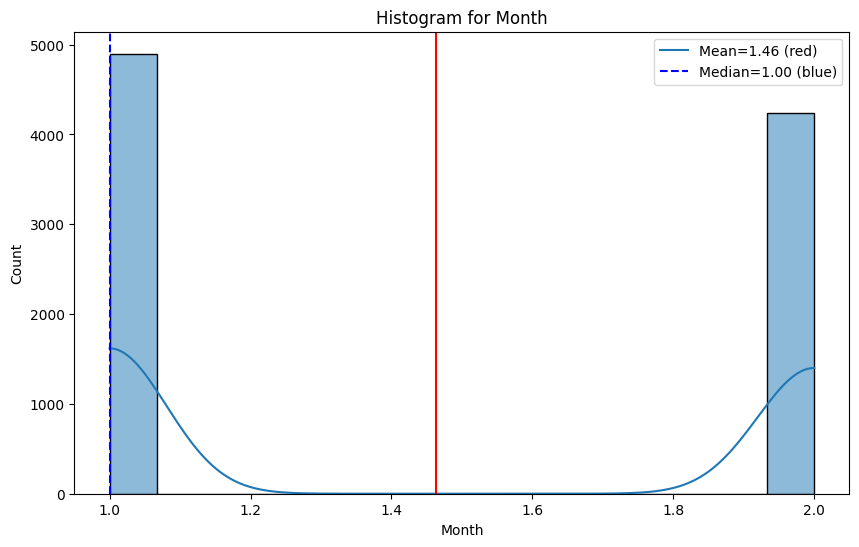

In [26]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


for col in df_numerical.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df_numerical[col], kde=True)
    mean_value = df_numerical[col].mean()
    median_value = df_numerical[col].median()
    plt.axvline(median_value, color='b', linestyle='--')
    plt.axvline(mean_value, color='r', linestyle='-')
    plt.legend({f'Mean={mean_value:.2f} (red)':mean_value, f'Median={median_value:.2f} (blue)':median_value})
    plt.title(f'Histogram for {col}')

    plt.show()

**Customer Lifetime Value:**
The histogram data reveals a right-skewed distribution, suggesting that the majority of customers possess a lower lifetime value, while a smaller segment of customers exhibits a higher lifetime value.

**Income:**
In the histogram representation, a relatively symmetrical distribution is observed, with a central peak around $30,000. However, there is an extended tail towards higher income levels.

**Monthly Premium Auto:**
The histogram data indicates a relatively symmetrical distribution, featuring a peak value around $70. Notably, there are no prominent signs of significant skewness within this distribution.

**Months Since Last Claim:**
The histogram visualization presents an even distribution across various bin ranges, implying a fairly symmetrical distribution of data points.

**Months Since Policy Inception:**
The histogram data illustrates an evenly distributed pattern across different bin ranges, signifying a relatively symmetrical distribution.

**Number of Open Complaints:**
In the histogram representation, the data exhibits a highly skewed distribution. Most customers have zero open complaints, while a small minority reports having a few open complaints.

**Number of Policies:**
The histogram graph demonstrates a relatively symmetrical distribution, with a distinct peak occurring at a value of 1. The frequency of occurrences gradually declines as the number of policies increases.

**Total Claim Amount:**
The histogram visualization shows a slightly right-skewed distribution. It highlights a concentration of lower claim amounts, along with a tail extending towards higher claim amounts.


__8. Do the same with the categorical variables (be careful, you may need to change the plot type to one better suited for continuous data!). Comment what you can see in the plots. You should also delete the column customer_id before you can try to use a for loop on all the categorical columns. Discuss why is deleting the column customer_id required. Hint: Use bar plots to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis.__

In [27]:
df_categorical = customer_df.select_dtypes(include=['object'])

In [ ]:
df_categorical = df_categorical.drop(['customer'], axis=1)

In [ ]:
outliers_dict = {}
for col in df_numerical.columns:
    # Calculate Q1, Q3, and IQR
    Q1 = df_numerical[col].quantile(0.25)
    Q3 = df_numerical[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers
    outliers = df_numerical[(df_numerical[col] < (Q1 - 1.5 * IQR)) | (df_numerical[col] > (Q3 + 1.5 * IQR))][col]


    n_outliers = len(outliers)
    percentage = (n_outliers / len(df_numerical)) * 100


    outliers_dict[col] = {'count': n_outliers, 'percentage': percentage}

# Print the number and percentage of outliers for each column
for col, outlier_info in outliers_dict.items():
    print(f'{col}: {outlier_info["count"]} outliers ({outlier_info["percentage"]:.2f}%)')